In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///C:\\Users\\Gamer\\Downloads/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
measurement_first = session.query(measurement).first()
measurement_first.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1ca824ef610>,
 'date': '2010-01-01',
 'tobs': 65.0,
 'prcp': 0.08,
 'id': 1,
 'station': 'USC00519397'}

In [11]:
station_first = session.query(station).first()
station_first.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1ca824ef760>,
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'station': 'USC00519397'}

<function matplotlib.pyplot.show(close=None, block=None)>

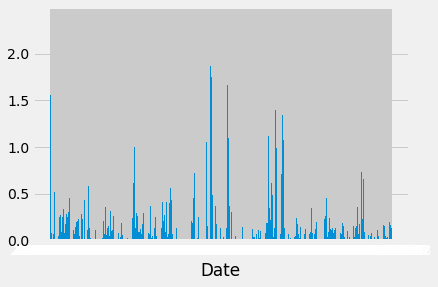

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Latest Date
latest_date = session.query(measurement.date).order_by(measurement.date.desc()).first().date

twelve_months_precip = dt.datetime.strptime(latest_date, '%Y-%m-%d') - dt.timedelta(days=365)
twelve_months_precip


# Perform a query to retrieve the data and precipitation scores
precip_query = session.query(measurement.date, func.avg(measurement.prcp)).\
                    filter(measurement.date >= twelve_months_precip).\
                    group_by(measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precip_query, columns=['Date', 'Precipitation'])
precip_df.set_index('Date', inplace=True)
precip_df.head()

# Sort the dataframe by date
precip_df = precip_df.sort_values(by=['Date'])

# Use Pandas Plotting with Matplotlib to plot the data

#precip_df.plot.bar(y='Precipitation')
plt.bar(precip_df.index, precip_df['Precipitation'])
plt.xticks(color='w')
plt.xlabel('Date')
plt.show

In [23]:
latest_date

'2017-08-23'

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
session.query(station.id).count()

9

In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)).\
            group_by(measurement.station).\
            order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
best_station = active_stations[0][0]
session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
                filter(measurement.station == best_station).all()

[(54.0, 71.66378066378067, 85.0)]

Text(0.5, 1.0, '')

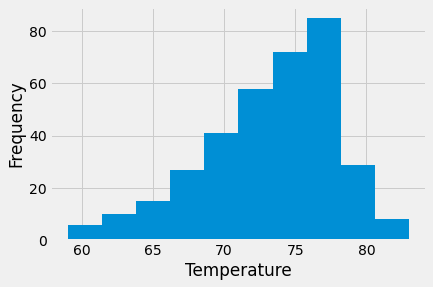

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_query = session.query(measurement.station, measurement.tobs).\
                filter(measurement.station == best_station).\
                filter(measurement.date >= twelve_months_precip).all()
temp_df = pd.DataFrame(temp_query, columns = ['station', 'temperature'])
temp_df.set_index('station', inplace=True)
temp_df.head()

temp_plot = temp_df.hist(column = 'temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('')

# Close session

In [18]:
# Close Session
session.close()

In [22]:
precip_dict = {Date: Precipitation for Date, Precipitation in precip_query}

precip_dict

{'2016-08-24': 1.5549999999999997,
 '2016-08-25': 0.07714285714285715,
 '2016-08-26': 0.016666666666666666,
 '2016-08-27': 0.06399999999999999,
 '2016-08-28': 0.5166666666666666,
 '2016-08-29': 0.24333333333333332,
 '2016-08-30': 0.011666666666666667,
 '2016-08-31': 0.6359999999999999,
 '2016-09-01': 0.006,
 '2016-09-02': 0.05,
 '2016-09-03': 0.254,
 '2016-09-04': 0.276,
 '2016-09-05': 0.08499999999999999,
 '2016-09-06': 0.246,
 '2016-09-07': 0.3333333333333333,
 '2016-09-08': 0.07666666666666667,
 '2016-09-09': 0.17833333333333332,
 '2016-09-10': 0.27999999999999997,
 '2016-09-11': 0.25,
 '2016-09-12': 0.308,
 '2016-09-13': 0.45166666666666666,
 '2016-09-14': 2.3800000000000003,
 '2016-09-15': 0.8266666666666667,
 '2016-09-16': 0.11714285714285715,
 '2016-09-17': 0.13599999999999998,
 '2016-09-18': 0.10600000000000001,
 '2016-09-19': 0.064,
 '2016-09-20': 0.14714285714285716,
 '2016-09-21': 0.19499999999999998,
 '2016-09-22': 0.2057142857142857,
 '2016-09-23': 0.22428571428571428,
 '2